In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)
u = np.mean(X,axis =0)
std = np.std(X,axis =0)
X = (X-u)/std

In [5]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [18]:
def hypothesis(x,theta):
    return np.dot(x,theta)
def error(X,Y,theta):
    y_hat = hypothesis(X,theta)
    return sum((Y - y_hat)**2)/Y.shape[0]
def gradient(X,Y,theta):
    y_hat = hypothesis(X,theta)
    g = np.dot(X.T,y_hat - Y)/X.shape[0]
    return g
# Batch gradient desent 
def gradient_desent(x_data,y_data,lr=0.01,max_itr = 300):
    m,n = x_data.shape
    theta = np.zeros(n)
    error_list = []
    for i in range(max_itr):
        error_list.append(error(x_data,y_data,theta))
        g =gradient(x_data,y_data,theta)
        theta = theta - lr*g;
    return theta,error_list

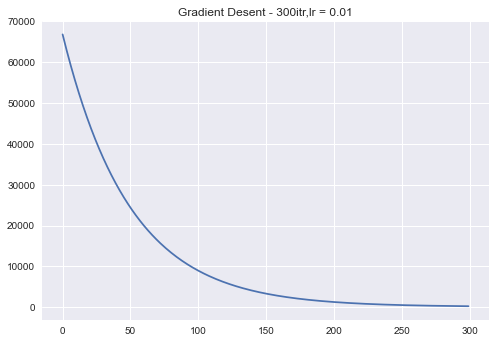

time taken :  2.0644783973693848


In [44]:
start = time.time()
theta,error_list = gradient_desent(X,y)
plt.plot(error_list)
plt.title("Gradient Desent - 300itr,lr = 0.01")
plt.show()
end = time.time()
print("time taken : ",end-start )

## Mini batch gradient descent

In [59]:
def batch_gradient_decent(X,y,batch_size=100,lr=0.01,max_itrs=50):
    m,n = X.shape
    theta = np.zeros(n)
    error_list = []
    data = np.hstack((X,y.reshape(-1,1)))
    for j in range(max_itrs):
        error_list.append(error(X,y,theta))
        total_batches = m//batch_size
        np.random.shuffle(data)
        for i in range(total_batches):
            batch_data = data[i*batch_size:(i+1)*batch_size]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            g =gradient(x_batch,y_batch,theta)
            theta = theta - lr*g;
    return theta,error_list 

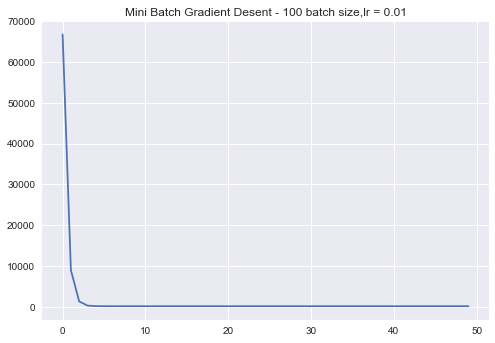

time taken :  2.7433650493621826


In [60]:
import time
start = time.time()
theta,error_list = batch_gradient_decent(X,y)
plt.plot(error_list)
plt.title("Mini Batch Gradient Desent - 100 batch size,lr = 0.01")
plt.show()
end = time.time()
print("time taken : ",end-start )

In [36]:
print(X.shape,y.shape)

(10000, 21) (10000,)


In [61]:
error_list[-1]

101.46726195913507